In [1]:
import os
import random
import pandas as pd
from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.misc import imresize
import numpy as np
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Flatten, Dense, InputLayer, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


/home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


Age:  MIDDLE


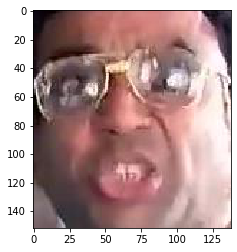

In [3]:
state = random.choice(train.index)
imgName = train.ID[state]

img = imread(os.path.join('./Train', imgName))

print('Age: ', train.Class[state])
plt.imshow(img)

In [4]:
def cleanResize(data,location):
    temp = []
    for imgName in data.ID:
        img = imread(os.path.join(location, imgName))
        img = imresize(img,(32,32))
        img = img.astype('float32')
        temp.append(img)
     
    cleaned = np.stack(temp)
    return cleaned
        

In [5]:
train_x = cleanResize(train,'./Train')
test_x = cleanResize(test,'./Test')

/home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [6]:
train_x /= 255
test_x /= 255

In [7]:
encoder = LabelEncoder()

train_y = encoder.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)
train_y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [8]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 20
batch_size = 256

In [9]:

model = Sequential(
[ InputLayer(input_shape = input_num_units),
 Conv2D(50, (28, 28), padding="same", activation="relu"),
 MaxPooling2D(pool_size=(2, 2)),
 Conv2D(100, (20, 20), padding="same", activation="relu"),
 MaxPooling2D(pool_size=(2, 2)),
 Conv2D(100, (3, 3), padding="same", activation="relu"),
    Flatten(),
   Dense(input_shape = input_num_units,units=output_num_units, activation='softmax'), 
])

W0928 16:23:53.406512 140061575374592 deprecation_wrapper.py:119] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0928 16:23:53.890306 140061575374592 deprecation_wrapper.py:119] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 16:23:54.212530 140061575374592 deprecation_wrapper.py:119] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0928 16:23:54.638515 140061575374592 deprecation_wrapper.py:119] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        117650    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 100)       2000100   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 100)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 100)         90100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 19203     
Total para

In [11]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

W0928 16:23:55.086616 140061575374592 deprecation_wrapper.py:119] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0928 16:23:55.131775 140061575374592 deprecation_wrapper.py:119] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



W0928 16:23:55.966336 140061575374592 deprecation.py:323] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0928 16:23:56.088408 140061575374592 deprecation_wrapper.py:119] From /home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15924 samples, validate on 3982 samples
Epoch 1/20
15924/15924 [==============================] - 1644s 103ms/step - loss: 0.9521 - acc: 0.5415 - val_loss: 0.9393 - val_acc: 0.5439
Epoch 2/20
15924/15924 [==============================] - 1641s 103ms/step - loss: 0.9177 - acc: 0.5624 - val_loss: 0.9260 - val_acc: 0.5578
Epoch 3/20
15924/15924 [==============================] - 1638s 103ms/step - loss: 0.8892 - acc: 0.5806 - val_loss: 0.8704 - val_acc: 0.6090
Epoch 4/20
15924/15924 [==============================] - 1642s 103ms/step - loss: 0.8661 - acc: 0.5956 - val_loss: 0.9162 - val_acc: 0.5688
Epoch 5/20
15924/15924 [==============================] - 1644s 103ms/step - loss: 0.8504 - acc: 0.5997 - val_loss: 0.9452 - val_acc: 0.5565
Epoch 6/20
15924/15924 [==============================] - 1639s 103ms/step - loss: 0.8359 - acc: 0.6070 - val_loss: 0.8270 - val_acc: 0.6193
Epoch 7/20
15924/15924 [==============================] - 1741s 109ms/step - loss: 0.8246 - acc: 0.6174 -

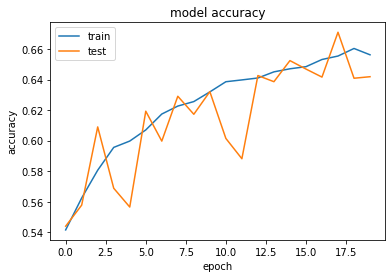

/home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'upper lllueft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


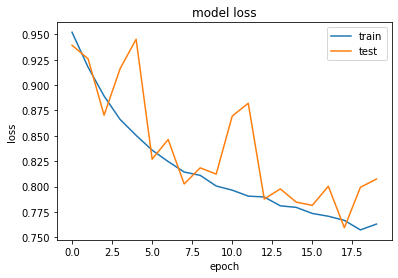

In [12]:
history = model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper lllueft')
plt.show()